In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import optimizers,models,layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

from tensorflow.keras.applications import vgg16,VGG16,DenseNet201,resnet50,ResNet50
from tensorflow.keras.applications.vgg16 import decode_predictions,preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import random
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data_aug_generator = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip =True,
    vertical_flip = False,
    rescale = 1./255
)

data_no_aug_generator = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_image_path = '/content/drive/My Drive/dataset/class_face/'
train_data_generator = data_aug_generator.flow_from_directory(
    train_image_path,
    target_size = (224,224),
    batch_size = 537,
    class_mode = 'sparse'
)

Found 537 images belonging to 20 classes.


In [ ]:
sample_training_images,labels = next(train_data_generator)

In [ ]:
X_train,X_test,train_labels,test_labels = train_test_split(sample_training_images,labels,test_size=0.3)

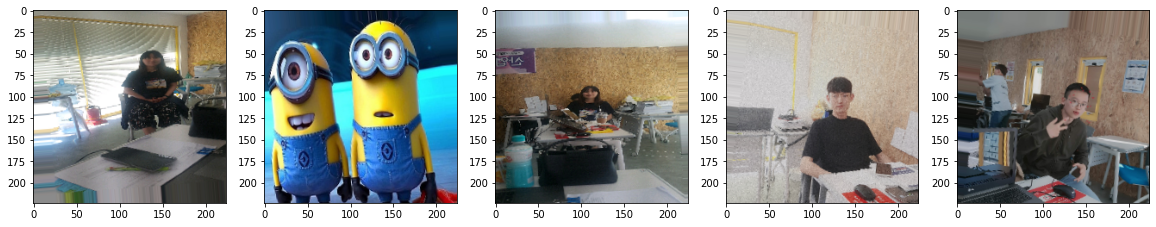

<Figure size 432x288 with 0 Axes>

In [ ]:

def plotimages(images_arr) :
    fig,axes =  plt.subplots(1, 5, figsize=(20,20))#plt.subplots(행, 열) 은 2개의 변수를 반환
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes) :
        ax.imshow(img)
    plt.tight_layout(
    plt.show()
    )

plotimages(sample_training_images[:5])

In [ ]:
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = Sequential([
            conv_layers,
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.7),
            Dense(18, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                18450     
Total params: 40,424,274
Trainable params: 25,709,586
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
epochs=10
batch_size = 32
historys = model.fit(X_train, train_labels, validation_data=(X_test, test_labels), batch_size=batch_size, epochs=epochs)

Epoch 1/10
12/12 [==============================] - 8s 661ms/step - loss: 8.3091 - accuracy: 0.1493 - val_loss: 2.5707 - val_accuracy: 0.4012
Epoch 2/10
12/12 [==============================] - 5s 400ms/step - loss: 2.1305 - accuracy: 0.5253 - val_loss: 1.1881 - val_accuracy: 0.6296
Epoch 3/10
12/12 [==============================] - 5s 394ms/step - loss: 0.9028 - accuracy: 0.7227 - val_loss: 0.9733 - val_accuracy: 0.7407
Epoch 4/10
12/12 [==============================] - 5s 395ms/step - loss: 0.6173 - accuracy: 0.7947 - val_loss: 0.8164 - val_accuracy: 0.7593
Epoch 5/10
12/12 [==============================] - 5s 389ms/step - loss: 0.5659 - accuracy: 0.8293 - val_loss: 0.8618 - val_accuracy: 0.7284
Epoch 6/10
12/12 [==============================] - 5s 386ms/step - loss: 0.3942 - accuracy: 0.8827 - val_loss: 0.7730 - val_accuracy: 0.7778
Epoch 7/10
12/12 [==============================] - 5s 382ms/step - loss: 0.3697 - accuracy: 0.8960 - val_loss: 0.7987 - val_accuracy: 0.7037
Epoch 

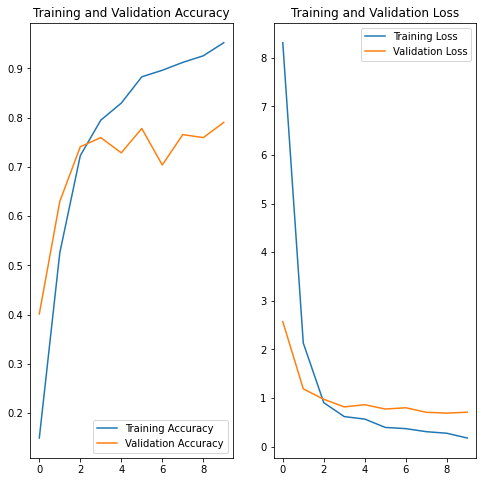

In [ ]:
epochs = 10
acc = historys.history['accuracy']
val_acc = historys.history['val_accuracy']

loss=historys.history['loss']
val_loss=historys.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict_decode_random_plot(data_generator,X_test,y_test,rows,cols,figsize=(20,20)) : #전체 결과 중 랜덤하게 가져옴
    predict = model.predict_classes(X_test)
    y_test = y_test.astype(np.int64)
    custom_labels = list(data_generator.class_indices.keys())
    preidct_decode =[None]*len(predict)
    label_decode = [None]*len(y_test)

    for i in range(len(predict)) :
        preidct_decode[i] = custom_labels[predict[i]] 
        label_decode[i] = custom_labels[y_test[i]]


    samples = random.choices(population=y_test, k=rows*cols)
    count = 0

    plt.figure(figsize=figsize)


    for n in samples :
        count += 1
        plt.subplot(rows, cols, count)
        plt.imshow(X_test[n])
        tmp = "Label:" + str(label_decode[n]) + "  ,Prediction:" + str(preidct_decode[n])
        plt.title(tmp)

    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

def decode_confusion (data_generator,X_test,y_test) : #confusion_matrix를 만들어줌
    predict = model.predict_classes(X_test)
    y_test = y_test.astype(np.int64)
    custom_labels = list(data_generator.class_indices.keys())
    preidct_decode =[None]*len(predict)
    label_decode = [None]*len(y_test)

    for i in range(len(predict)) :
        preidct_decode[i] = custom_labels[predict[i]] 
        label_decode[i] = custom_labels[y_test[i]]
    confm = confusion_matrix(label_decode, preidct_decode)
    columns = custom_labels[:18]
    df_cm = pd.DataFrame(confm, index=columns, columns=columns)
    plt.figure(figsize=(14,14))
    sn.heatmap(df_cm, cmap='Oranges', annot=True)

In [ ]:
def predict_decode_random_plot(data_generator,X_test,y_test,rows,cols,figsize=(20,20)) : #틀린 것 중 랜덤하게 가져옴
    predict = model.predict_classes(X_test)
    y_test = y_test.astype(np.int64)
    custom_labels = list(data_generator.class_indices.keys())
    preidct_decode =[None]*len(predict)
    label_decode = [None]*len(y_test)
    wrong_result = []

    for i in range(len(predict)) :
        preidct_decode[i] = custom_labels[predict[i]] 
        label_decode[i] = custom_labels[y_test[i]]

    for n in range(len(y_test)) :
        if label_dacode[n] != preidct_decode[n]:
            wrong_result.appen(n)

    samples = random.choices(population=wrong_result, k=rows*cols)
    count = 0

    plt.figure(figsize=figsize)


    for n in samples :
        count += 1
        plt.subplot(rows, cols, count)
        plt.imshow(X_test[n])
        tmp = "Label:" + str(label_decode[n]) + "  ,Prediction:" + str(preidct_decode[n])
        plt.title(tmp)

    plt.tight_layout()
    plt.show()


interpolation='nearest'디스플레이 해상도가 이미지 해상도와 같지 않은 경우 픽셀 사이에 보간하지 않고 이미지를 표시하기 만하면됩니다 (대부분의 경우). 픽셀이 여러 픽셀의 정사각형으로 표시되는 이미지가 생성됩니다

In [ ]:
predict_decode_random_plot(train_data_generator,X_test,test_labels,4,4)

Output hidden; open in https://colab.research.google.com to view.

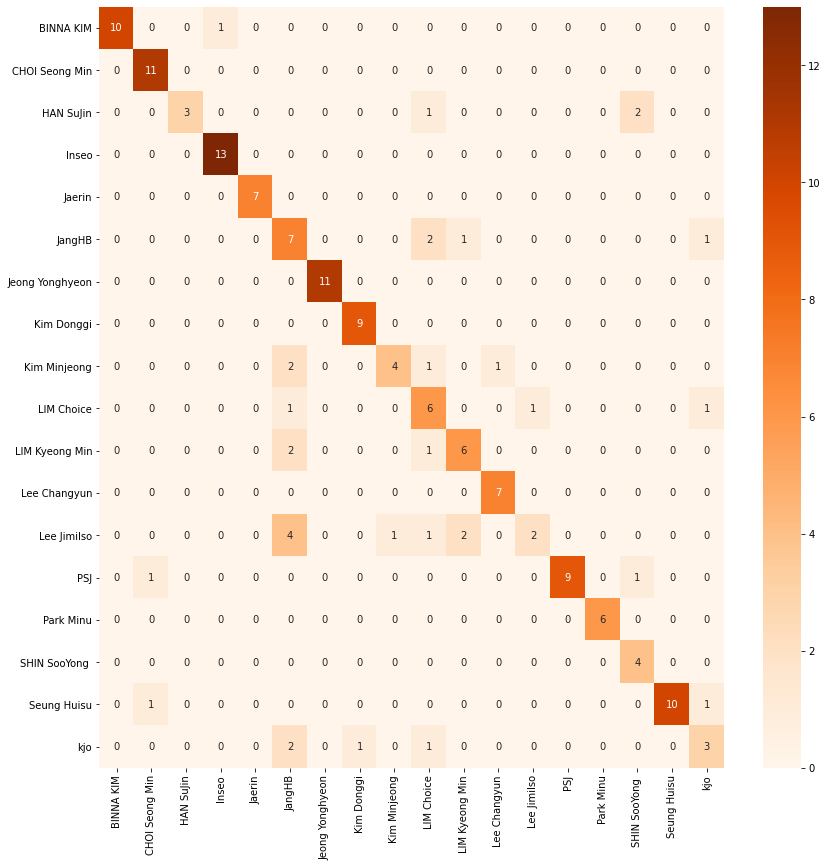

In [ ]:
a = decode_confusion(train_data_generator,X_test,test_labels)

In [ ]:
wrong_result_decode_random_plot(train_data_generator,X_test,test_labels,4,4)

Output hidden; open in https://colab.research.google.com to view.